In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdfkit
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [9]:
data = pd.read_csv ('malaysia2.csv')

In [10]:
X = data.index.values.reshape(-1,1)
y = data['Parcel Volume']

In [11]:
arima_model = ARIMA(y, order = (2,0,0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=1, end=len(y), typ='levels')

C:\Users\fiqxq\anaconda3\envs\ForcastPython\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [12]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly,y)

poly_predictions = poly_model.predict(X_poly)

In [13]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X,y)

rf_predictions = rf_model.predict(X)

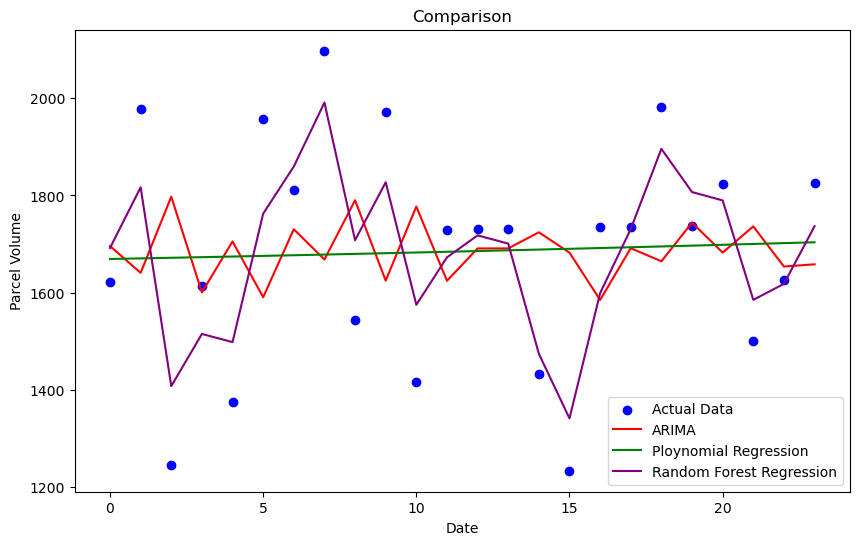

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,color = 'blue', label = 'Actual Data')
plt.plot(X, arima_predictions, color = 'red', label = 'ARIMA')
plt.plot(X, poly_predictions, color = 'green', label = 'Ploynomial Regression')
plt.plot(X, rf_predictions, color = 'purple', label = 'Random Forest Regression')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.title ('Comparison')
plt.legend()
plt.show()

In [16]:
arima_mse = mean_squared_error(y, arima_predictions)
arima_mae = mean_absolute_error(y, arima_predictions)

poly_mse = mean_squared_error(y, poly_predictions)
poly_mae = mean_absolute_error(y, poly_predictions)

rf_mse = mean_squared_error(y, rf_predictions)
rf_mae = mean_absolute_error(y, rf_predictions)

In [17]:
print('Arima Model:')
print("MAE:", arima_mse)
print("MSE:" , arima_mse)

print('\nPolynomial Regression:')
print("MAE:", poly_mse)
print("MSE:" , poly_mse)

print('\nRandom Forest Regression:')
print("MAE:", rf_mse)
print("MSE:" , rf_mse)

Arima Model:
MAE: 71000.28756742235
MSE: 71000.28756742235

Polynomial Regression:
MAE: 52735.545590858404
MSE: 52735.545590858404

Random Forest Regression:
MAE: 11331.116162499997
MSE: 11331.116162499997
